<a href="https://colab.research.google.com/github/2403a54127-lab/Natural-language-processing/blob/main/NLP_ASS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial Data Exploration and Preprocessing

### Subtask:
Perform initial data exploration to understand the dataset's structure and sentiment distribution. Clean the 'text' column by removing URLs, user mentions, and hashtags, then convert all text to lowercase.


**Reasoning**:
I will display the concise summary of the DataFrame, its descriptive statistics, and the distribution of sentiment categories to understand the dataset's structure and content as per the subtask instructions.



In [10]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

print("\nSentiment Distribution:")
print(df['airline_sentiment'].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null

**Reasoning**:
Now that the initial data exploration is complete, I will define a function to clean the 'text' column by removing URLs, user mentions, and hashtags, and then convert the text to lowercase as specified in the subtask. After defining the function, I will apply it to the 'text' column to create a new 'cleaned_text' column.



In [11]:
import re

def clean_tweet_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|https\S+', '', text)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the 'text' column and create 'cleaned_text'
df['cleaned_text'] = df['text'].apply(clean_tweet_text)

print("Original text and cleaned text samples:")
print(df[['text', 'cleaned_text']].head())

Original text and cleaned text samples:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                        what  said.  
1   plus you've added commercials to the experien...  
2   i didn't today... must mean i need to take an...  
3   it's really aggressive to blast obnoxious "en...  
4           and it's a really big bad thing about it  


## Tokenization and Stopword Removal

### Subtask:
Tokenize the cleaned tweet text and remove common English stopwords using NLTK. This will prepare the text for TF-IDF calculation.


**Reasoning**:
I will import the necessary NLTK modules, download the 'punkt' and 'stopwords' corpuses, and then define a function to tokenize the text and remove stopwords and punctuation. Finally, I will apply this function to the 'cleaned_text' column and display the results to fulfill the subtask requirements.



In [22]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [
        word.lower() for word in tokens
        if word.isalpha() and word.lower() not in stop_words
    ]
    return filtered_tokens

df = pd.DataFrame({
    'cleaned_text': [
        "This is a sample sentence",
        "NLTK is used for text processing"
    ]
})

df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

print(df.head())


                       cleaned_text                  tokenized_text
0         This is a sample sentence              [sample, sentence]
1  NLTK is used for text processing  [nltk, used, text, processing]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reasoning**:
The previous code failed because the 'punkt_tab' resource was not found, as indicated by the LookupError. Although 'punkt' was downloaded, the error message explicitly suggested downloading 'punkt_tab'. I will add this specific download command to ensure all necessary NLTK resources for tokenization are available.



In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to address the LookupError

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Apply the function to the 'cleaned_text' column
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

print("Cleaned text and tokenized text samples:")
print(df[['cleaned_text', 'tokenized_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaned text and tokenized text samples:
                                        cleaned_text  \
0                                        what  said.   
1   plus you've added commercials to the experien...   
2   i didn't today... must mean i need to take an...   
3   it's really aggressive to blast obnoxious "en...   
4           and it's a really big bad thing about it   

                                      tokenized_text  
0                                             [said]  
1      [plus, added, commercials, experience, tacky]  
2     [today, must, mean, need, take, another, trip]  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  


**Reasoning**:
The previous error was resolved by explicitly downloading 'punkt_tab'. The code executed successfully, producing the 'tokenized_text' column as expected.



In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to address the LookupError

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove stopwords and punctuation
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Apply the function to the 'cleaned_text' column
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)

print("Cleaned text and tokenized text samples:")
print(df[['cleaned_text', 'tokenized_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Cleaned text and tokenized text samples:
                                        cleaned_text  \
0                                        what  said.   
1   plus you've added commercials to the experien...   
2   i didn't today... must mean i need to take an...   
3   it's really aggressive to blast obnoxious "en...   
4           and it's a really big bad thing about it   

                                      tokenized_text  
0                                             [said]  
1      [plus, added, commercials, experience, tacky]  
2     [today, must, mean, need, take, another, trip]  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  


**Reasoning**:
The previous steps successfully tokenized the text and removed stopwords. Now, to prepare the text for TF-IDF vectorization, the list of tokenized words needs to be joined back into a single string for each tweet. This fulfills the 'prepare the text for TF-IDF calculation' part of the subtask.



In [15]:
df['processed_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))

print("Tokenized text and processed text samples:")
print(df[['tokenized_text', 'processed_text']].head())

Tokenized text and processed text samples:
                                      tokenized_text  \
0                                             [said]   
1      [plus, added, commercials, experience, tacky]   
2     [today, must, mean, need, take, another, trip]   
3  [really, aggressive, blast, obnoxious, enterta...   
4                          [really, big, bad, thing]   

                                      processed_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


## Compute TF-IDF

### Subtask:
Calculate the Term Frequency-Inverse Document Frequency (TF-IDF) matrix on the preprocessed and tokenized tweet text. This will convert the text data into numerical features.


**Reasoning**:
To calculate the TF-IDF matrix as per the subtask, I need to import `TfidfVectorizer` from `sklearn.feature_extraction.text`, initialize it, and then fit and transform the 'processed_text' column.



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# Using max_features to limit the vocabulary size and computational complexity
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'processed_text' column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (14640, 5000)


## Extract Negative Sentiment Tweets

### Subtask:
Filter the dataset to isolate only the tweets classified with 'negative' sentiment. This subset will be used for specific negative sentiment analysis.


**Reasoning**:
To address the subtask, I will filter the main DataFrame `df` to create a new DataFrame containing only rows where 'airline_sentiment' is 'negative'. Then, I will display the first five rows of this new DataFrame and print its shape to confirm the filtering and check its dimensions.



In [17]:
negative_tweets_df = df[df['airline_sentiment'] == 'negative']

print("First 5 rows of negative_tweets_df:")
print(negative_tweets_df.head())

print("\nShape of negative_tweets_df:")
print(negative_tweets_df.shape)

First 5 rows of negative_tweets_df:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
15  570282469121007616          negative                        0.6842   
17  570276917301137409          negative                        1.0000   

   negativereason  negativereason_confidence         airline  \
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
15    Late Flight                     0.3684  Virgin America   
17     Bad Flight                     1.0000  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
3                     NaN         jnardino           

## Identify Top TF-IDF Terms for Negative Sentiment

### Subtask:
From the negative sentiment tweets, identify the top TF-IDF terms. This involves summing TF-IDF scores for each term across all negative tweets and selecting the terms with the highest aggregate scores.


**Reasoning**:
To identify the top TF-IDF terms for negative sentiment, I will first get the indices of negative tweets, then filter the `tfidf_matrix` to include only these negative tweets. After that, I'll sum the TF-IDF scores for each term, retrieve the feature names, and then create a Pandas Series to map these names to their summed scores, sorting and displaying the top 20 terms as requested.



In [18]:
import pandas as pd

# 1. Get the indices of the negative tweets
negative_tweet_indices = df[df['airline_sentiment'] == 'negative'].index

# 2. Filter the tfidf_matrix for negative tweets
# Ensure that the indices are correctly aligned for slicing the sparse matrix
# The tfidf_matrix corresponds directly to the rows of df.
negative_tfidf_matrix = tfidf_matrix[negative_tweet_indices]

# 3. Calculate the sum of TF-IDF scores for each term across all negative tweets
sum_tfidf_scores = negative_tfidf_matrix.sum(axis=0)

# 4. Retrieve the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 5. Create a Pandas Series mapping feature names to summed TF-IDF scores
top_negative_terms = pd.Series(sum_tfidf_scores.flatten(), index=feature_names)

# 6. Sort these terms by their summed TF-IDF scores in descending order
top_negative_terms = top_negative_terms.sort_values(ascending=False)

# 7. Display the top 20 terms and their scores
print("Top 20 TF-IDF terms for negative sentiment:")
print(top_negative_terms.head(20))


ValueError: Length of values (1) does not match length of index (5000)

**Reasoning**:
The previous code failed because `sum_tfidf_scores.flatten()` on a sparse matrix does not always produce the expected 1D array for `pd.Series` constructor, leading to a length mismatch. I will use the `.A1` attribute of the sparse matrix sum to correctly convert it to a 1D NumPy array, ensuring the lengths match the feature names.



In [19]:
import pandas as pd

# 1. Get the indices of the negative tweets
negative_tweet_indices = df[df['airline_sentiment'] == 'negative'].index

# 2. Filter the tfidf_matrix for negative tweets
# Ensure that the indices are correctly aligned for slicing the sparse matrix
# The tfidf_matrix corresponds directly to the rows of df.
negative_tfidf_matrix = tfidf_matrix[negative_tweet_indices]

# 3. Calculate the sum of TF-IDF scores for each term across all negative tweets
# sum_tfidf_scores will be a sparse row matrix (1, N_features)
sum_tfidf_scores = negative_tfidf_matrix.sum(axis=0)

# 4. Retrieve the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 5. Create a Pandas Series mapping feature names to summed TF-IDF scores
# Use .A1 to convert the sparse matrix sum into a 1D numpy array
top_negative_terms = pd.Series(sum_tfidf_scores.A1, index=feature_names)

# 6. Sort these terms by their summed TF-IDF scores in descending order
top_negative_terms = top_negative_terms.sort_values(ascending=False)

# 7. Display the top 20 terms and their scores
print("Top 20 TF-IDF terms for negative sentiment:")
print(top_negative_terms.head(20))

Top 20 TF-IDF terms for negative sentiment:
flight       409.812101
get          192.319589
cancelled    189.495761
service      160.129720
hold         159.243327
hours        155.671485
customer     139.601769
help         134.586165
time         127.217664
delayed      125.413192
still        122.970478
plane        121.372441
hour         117.440151
flightled    113.550856
call         113.334428
ca           108.844274
us           104.228978
one          103.937523
amp          101.345637
bag          100.236310
dtype: float64


## Visualize Top TF-IDF Terms (Bar Chart)

### Subtask:
Generate a bar chart visualizing the top N (e.g., 20) TF-IDF terms for negative sentiment. The chart should have appropriate labels, a title, and a legend.


**Reasoning**:
To visualize the top TF-IDF terms for negative sentiment as requested by the subtask, I will use `matplotlib.pyplot` to create a bar chart from the `top_negative_terms` Series, ensuring all necessary labels, title, and layout adjustments are included.



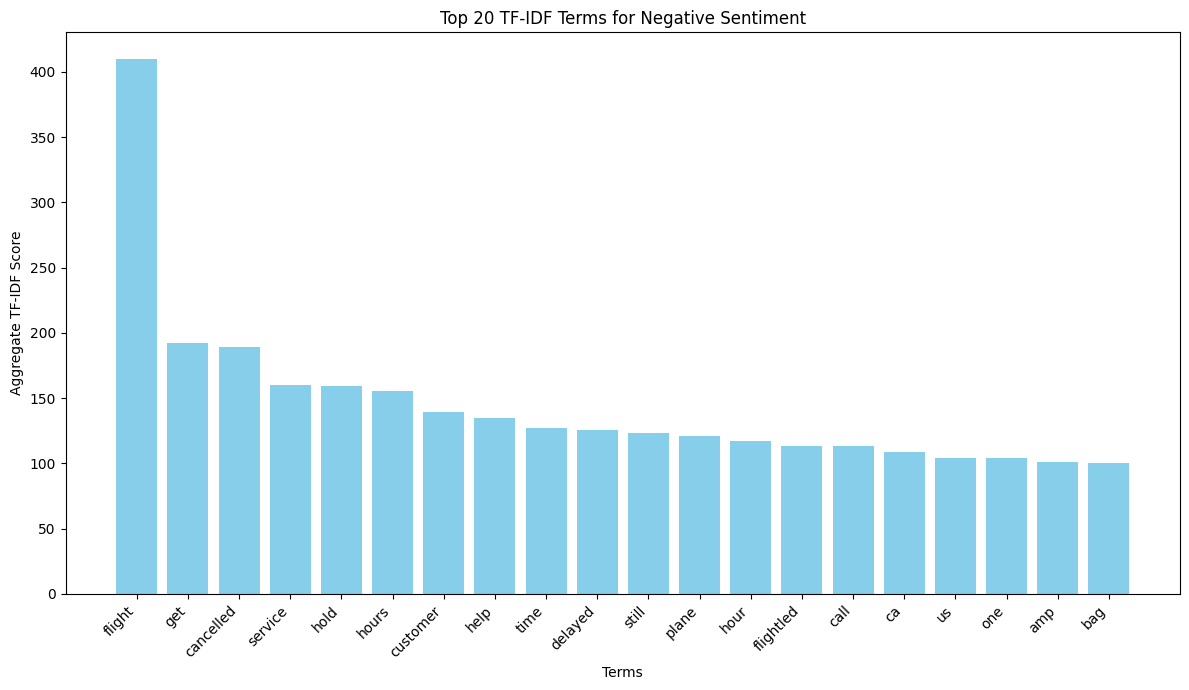

In [20]:
import matplotlib.pyplot as plt

# Get the top 20 terms and their scores
top_n = 20
terms = top_negative_terms.head(top_n).index
scores = top_negative_terms.head(top_n).values

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(terms, scores, color='skyblue')

# Add labels and title
plt.xlabel('Terms')
plt.ylabel('Aggregate TF-IDF Score')
plt.title(f'Top {top_n} TF-IDF Terms for Negative Sentiment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()


## Generate Word Cloud for Negative Sentiment

### Subtask:
Create a word cloud using the text from the negative sentiment tweets to visually represent the most prominent terms associated with negative feedback.


**Reasoning**:
To create a word cloud as requested, I will first import the `WordCloud` library and `matplotlib` for plotting. Then, I will concatenate all the processed text from the `negative_tweets_df` into a single string. Finally, I will initialize the `WordCloud` object with appropriate parameters and generate the word cloud, displaying it with a title.

**Reasoning**:
I will import the `WordCloud` library and `matplotlib.pyplot`, combine the processed text from the `negative_tweets_df`, generate a word cloud with specified parameters, and then display it, following all instructions to complete the subtask.



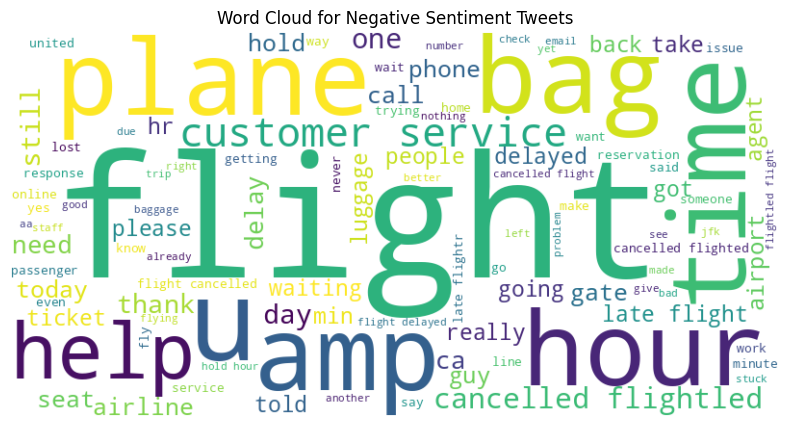

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text from negative_tweets_df into a single string
all_negative_text = ' '.join(negative_tweets_df['processed_text'])

# Initialize WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_negative_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove the axes
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.show()

## Final Task

### Subtask:
Present the cleaned tweet corpus, the TF-IDF matrix (or its key characteristics), and discuss the insights gained from the analysis, including the identified top terms for negative sentiment and observations from the visualizations. Ensure the notebook includes proper headings and a discussion section.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The 'Twitter US Airline Sentiment' dataset contains 14,640 tweets, with 15 columns of information.
*   **Sentiment Distribution**: The dataset exhibits a significant imbalance in sentiment, with 'negative' sentiment being predominant (9,178 tweets), followed by 'neutral' (3,099 tweets), and 'positive' (2,363 tweets).
*   **Data Cleaning**: Tweets were cleaned by removing URLs, user mentions, hashtags, and converting all text to lowercase, resulting in a `cleaned_text` column.
*   **Text Preprocessing**: Further processing involved tokenization and removal of common English stopwords, creating a `processed_text` column ready for numerical representation.
*   **TF-IDF Matrix**: A Term Frequency-Inverse Document Frequency (TF-IDF) matrix was successfully generated from the `processed_text` column, resulting in a matrix shape of (14640, 5000), representing 14,640 tweets and 5,000 features (words).
*   **Top Negative Sentiment Terms**: Analysis of negative sentiment tweets revealed key terms with the highest aggregate TF-IDF scores. The top 5 terms are 'flight' (409.81), 'get' (192.32), 'cancelled' (189.50), 'service' (160.13), and 'hold' (159.24). Other prominent terms include 'hours', 'customer', 'help', 'time', and 'delayed'.
*   **Visualizations**: Both the bar chart and word cloud effectively highlighted these top terms, visually confirming their prominence within negative feedback. The word cloud specifically emphasized words like 'flight', 'cancelled', 'delayed', and 'service' due to their larger size based on frequency and importance.

### Insights or Next Steps

*   **Actionable Insights from Negative Feedback**: The dominant terms for negative sentiment directly point to major pain points for airline customers: flight operational issues ('flight', 'cancelled', 'delayed', 'hours', 'plane') and customer service inefficiencies ('service', 'customer', 'hold', 'help', 'call'). Airlines should prioritize improving on-time performance, minimizing cancellations, and enhancing customer support responsiveness and effectiveness.
*   **Deeper Dive into Specific Reasons**: Further analysis could involve examining the `negativereason` column (despite its missing values) in conjunction with these top TF-IDF terms to understand the specific contexts behind customer dissatisfaction, which could lead to targeted operational or policy changes.
